# IEEE-CIS Fraud Detection
## Exploration Notebook 1

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Data

In [2]:
X1 = pd.read_csv('data/train_transaction.csv') # transaction data
X2 = pd.read_csv('data/train_identity.csv') # id data
train = X1.merge(X2, on = 'TransactionID', how = 'left') # merging id and transaction data

In [3]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Output Variable

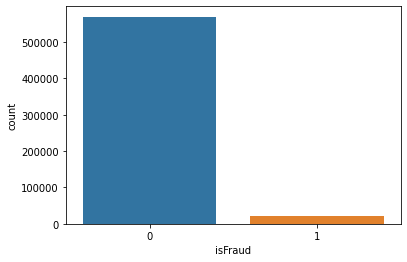

In [4]:
sns.countplot(data = train, x = 'isFraud')
plt.show()

In [5]:
train['isFraud'].value_counts(normalize = True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

We have an extremely imbalanced dataset. About 3.5% of the observations in the dataset are fraudulent transactions.

### Transaction Features
`TransactionDT`: timedelta from a given reference datetime (not an actual timestamp)

In [33]:
train['TransactionDT'].isna().sum()/len(train) # proportion of TransactionDT that is missing

0.0

`TransactionDT` has no missing values.

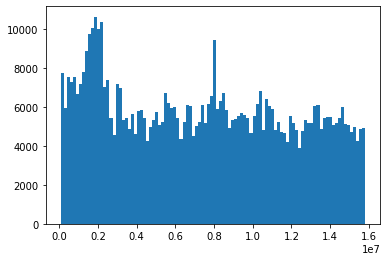

In [6]:
plt.hist(train['TransactionDT'], bins = 100) 
plt.show()

`TransactionAmt`: transaction payment amount in USD

In [35]:
train['TransactionAmt'].isna().sum()/len(train)

0.0

No missing values for `TransactionAmt`.

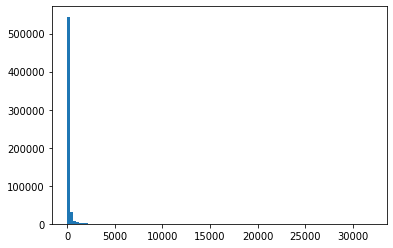

In [7]:
plt.hist(train['TransactionAmt'], bins = 100)
plt.show()

`ProductCD`: product code, the product for each transaction

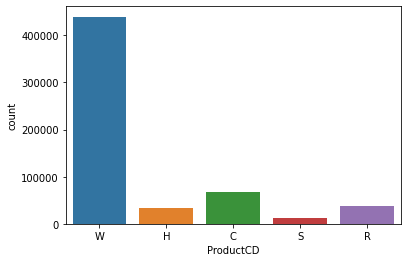

In [13]:
sns.countplot(x = train['ProductCD'])
plt.show()

In [29]:
train['ProductCD'].value_counts(normalize = True, dropna = False)

W    0.744522
C    0.116028
R    0.063838
H    0.055922
S    0.019690
Name: ProductCD, dtype: float64

**card1-card6**: payment card information, such as card type, card category, issue bank, country, etc.

In [37]:
card_list = ['card1','card2','card3','card4','card5','card6']
train[card_list].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [42]:
for c in card_list:
    print('{} : {}% missing'.format(c, round(train[c].isna().sum()/len(train)*100,5)))

card1 : 0.0% missing
card2 : 1.51268% missing
card3 : 0.26501% missing
card4 : 0.26704% missing
card5 : 0.7212% missing
card6 : 0.26603% missing


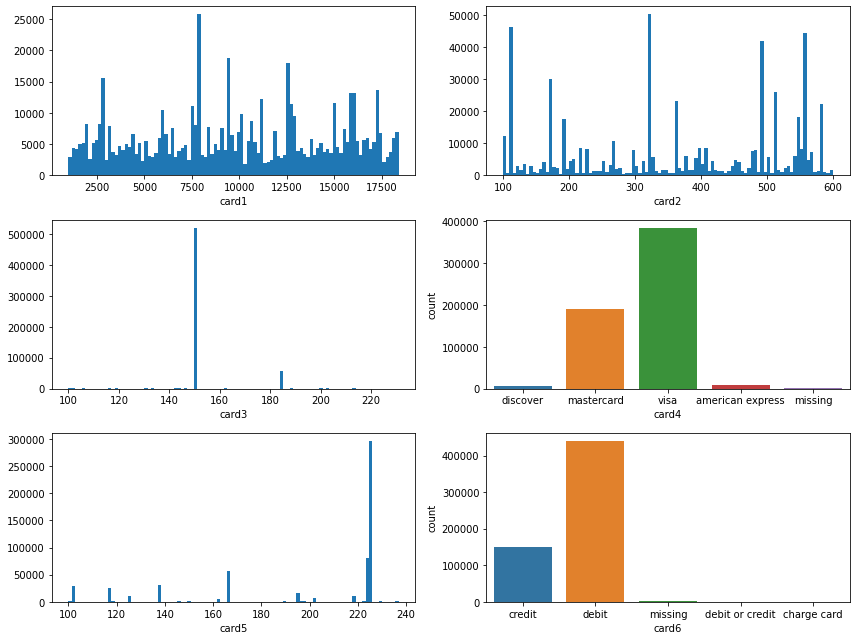

In [53]:
fig, ax = plt.subplots(3,2, figsize = (12,9))
ax[0][0].hist(train['card1'], bins = 100)
ax[0][0].set_xlabel('card1')

ax[0][1].hist(train['card2'], bins = 100)
ax[0][1].set_xlabel('card2')

ax[1][0].hist(train['card3'], bins = 100)
ax[1][0].set_xlabel('card3')

sns.countplot(x = train['card4'].fillna('missing'), ax = ax[1][1])
ax[1][1].set_xlabel('card4')

ax[2][0].hist(train['card5'], bins = 100)
ax[2][0].set_xlabel('card5')

sns.countplot(x = train['card6'].fillna('missing'), ax = ax[2][1])
ax[2][1].set_xlabel('card6')

fig.tight_layout()
plt.show()